In [28]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import Weibo2014
from moabb.datasets import Zhou2016
from moabb.datasets import BNCI2014004
from moabb.datasets import BNCI2014002
from moabb.datasets import BNCI2015001
from moabb.datasets import AlexMI


from moabb.evaluations import WithinSessionEvaluation
from moabb.evaluations import CrossSessionEvaluation


import mne
from mne.preprocessing import Xdawn
from mne.decoding import CSP


from moabb.paradigms import MotorImagery
from pyriemann.estimation import Covariances
from pyriemann.utils.covariance import covariances
from pyriemann.estimation import ERPCovariances
from pyriemann.estimation import XdawnCovariances
from pyriemann.classification import MDM
from pyriemann.classification import KNearestNeighbor
from pyriemann.tangentspace import TangentSpace
from pyriemann.datasets import make_gaussian_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [29]:
paradigm = MotorImagery()
paradigm_name = 'MI'

Choosing from all possible events


In [30]:
pipelines = {}
pipelines["(1) epo-mdm-euc"] = make_pipeline(MDM(metric="euclid"))
#pipelines["(2) epo-knn-euc"] = make_pipeline(KNearestNeighbor(), MDM(metric="euclid"))
# #default 5 neighbors
# pipelines["(3) cov-dia-lda"] = make_pipeline(Covariances('oas'), LDA())
# #sch for schaffer
pipelines["(4) epo-csp-lda"] = make_pipeline(CSP(), LDA())
pipelines["(5) cov-knn-euc"] = make_pipeline(Covariances('oas'), KNearestNeighbor(metric="euclid"))
pipelines["(6) cov-knn-rie"] = make_pipeline(Covariances('oas'), KNearestNeighbor())
# # #default riemannian
pipelines["(7) cov-mdm-euc"] = make_pipeline(Covariances('oas'), MDM(metric="euclid"))
pipelines["(8) cov-mdm-rie"] = make_pipeline(Covariances('oas'), MDM())
pipelines["(9) cov-tgs-lda"] = make_pipeline(Covariances('oas'), TangentSpace(), LDA())
# # #(default: 'riemann')
#4, 8, 9


In [82]:
pipe = [pipelines["(1) epo-mdm-euc"], pipelines["(4) epo-csp-lda"], pipelines["(5) cov-knn-euc"], pipelines["(6) cov-knn-rie"], pipelines["(7) cov-mdm-euc"], pipelines["(8) cov-mdm-rie"], pipelines["(9) cov-tgs-lda"]]
pipe_names = ["(1) epo-mdm-euc", "(4) epo-csp-lda", "(5) cov-knn-euc", "(6) cov-knn-rie", "(7) cov-mdm-euc", "(8) cov-mdm-rie", "(9) cov-tgs-lda"]
datasets_names = ["Zhou2016", "AlexMI"]

In [85]:
scores_array = []
datasets = [Zhou2016(), AlexMI()]
subj = [1, 2, 3, 4]
subject_source = 1
paradigm = MotorImagery()
DSM = []
DSL = []
data_source = {}
for d in datasets:
    for p in pipe:
        X, labels, meta = paradigm.get_data(d, subjects=[subject_source])
        data_source['covs'], data_source['labels'] = Covariances('oas').fit_transform(X), labels
        DSM.append(data_source['covs'])
        DSL.append(data_source['labels'])
        scores_array.append(cross_val_score(p, data_source['covs'], data_source['labels'], cv=5, scoring='roc_auc').mean())
print(scores_array)

Choosing from all possible events


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Computing rank from data with rank=None
    Using tolerance 25 (2.2e-16 eps * 14 dim * 7.9e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9 (2.2e-16 eps * 14 dim * 3.2e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 25 (2.2e-16 eps * 14 dim * 7.9e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.8 (2.2e-16 eps * 14 dim * 3.2e+15  max singular value)
    Estimated rank

/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 305029  =      0.000 ...  1220.116 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 430479  =      0.000 ...  1721.916 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 252599  =      0.000 ...  1010.396 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 296649  =      0.000 ...  1186.596 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 233249  =      0.000 ...   932.996 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Reading 0 ... 226219  =      0.000 ...   904.876 secs...


/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])
/home/artim436/.local/lib/python3.8/site-packages/moabb/datasets/Zhou2016.py:102: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = read_raw_cnt(fname, preload=True, eog=["VEOU", "VEOL"])


Computing rank from data with rank=None
    Using tolerance 1.6 (2.2e-16 eps * 16 dim * 4.4e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 16 dim * 4.3e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4 (2.2e-16 eps * 16 dim * 4.1e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 16 dim * 4.3e+14  max singular value)
    Estimated ra

In [86]:
new_labels_names = []
labels = []
for i in range(len(DSL)):
    labels.append(DSL[i])
    new_labels_names.append([])
    while len(new_labels_names[i])<2:
        for elt in labels[i]:
            if elt not in new_labels_names[i]:
                new_labels_names[i].append(elt)
print(new_labels_names)
new_labels = [0,1]
print(new_labels)
source = {}
target_train = {}
target_test = {}

[['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['left_hand', 'right_hand'], ['right_hand', 'feet'], ['right_hand', 'feet'], ['right_hand', 'feet'], ['right_hand', 'feet'], ['right_hand', 'feet'], ['right_hand', 'feet'], ['right_hand', 'feet']]
[0, 1]


In [87]:
from sklearn.model_selection import KFold

def pred_truth(data_source_covs, data_source_labels, p, n_folds=5):
    n_folds = 5
    cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    PREDICTION = []
    TRUTH = []
    for train, test in cv.split(data_source_covs):
        TRUTH.append(data_source_labels[test])
        model = p.fit(data_source_covs[train], data_source_labels[train])
        a = model.predict_proba(data_source_covs[test])
        PREDICTION.append(a)
    return PREDICTION, TRUTH

In [88]:
def roc_homemade(prediction, truth, threshold, k, b):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    prediction2 =  []
    truth2 = []
    a = 0
    for i in range(len(prediction)):
        for j in range(len(prediction[i])):
            if prediction[i][j][0]>threshold:
                prediction2.append(0)
            else:
                prediction2.append(1)
            if truth[i][j] == new_labels_names[k][0]: 
                truth2.append(b)
            elif truth[i][j] == new_labels_names[k][1]: 
                truth2.append(1-b)
            if prediction2[a] == new_labels[0] and truth2[a] == new_labels[0]:
                tp += 1
            elif prediction2[a] == new_labels[1] and truth2[a] == new_labels[1]:
                tn += 1
            elif prediction2[a] == new_labels[0] and truth2[a] == new_labels[1]:
                fp += 1
            elif prediction2[a] == new_labels[1] and truth2[a] == new_labels[0]:
                fn += 1
            a += 1
    return tp, tn, fp, fn

def sensitivity(tp, tn, fp, fn):
    if tp+fn == 0:
        return 0
    return tp/(tp+fn)

def one_specificity(tp, tn, fp, fn):
    if fp+tn == 0:
        return 0
    return 1- (tn/(tn+fp))

def accuracy(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)


In [89]:
def accuracy_homemade(prediction, truth, k):
    prediction2 =  []
    truth2 = []
    a = 0
    cpt = 0
    threshold = 0.5
    for i in range(len(prediction)):
        for j in range(len(prediction[i])):
            if prediction[i][j][0]>threshold:
                prediction2.append(0)
            else:
                prediction2.append(1)
            if truth[i][j] == new_labels_names[k][0]: #right_hand
                truth2.append(0)
            elif truth[i][j] == new_labels_names[k][1]:  #feet
                truth2.append(1) 
            if prediction2[a] == truth2[a]:
                cpt += 1
            a += 1
    return cpt/a

In [90]:
ACCURACY = []
for i in range(len(DSM)):
    p = pipe[i%len(pipe)]
    pred = pred_truth(DSM[i], DSL[i], p, n_folds=5)[0]
    truth = pred_truth(DSM[i], DSL[i], p, n_folds=5)[1]
    ACCURACY.append(accuracy_homemade(pred, truth, i))

Computing rank from data with rank=None
    Using tolerance 24 (2.2e-16 eps * 14 dim * 7.8e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9 (2.2e-16 eps * 14 dim * 3.2e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated ran

In [91]:
def fct_roc(k, p):
    b = 0
    if ACCURACY[k] < 0.5:
        b = 1
    l_one_spec = []
    l_senstivity = []
    n= 100
    THRESHOLD = [i/n for i in range(0,n)]
    PREDICTION, TRUTH = pred_truth(DSM[k], DSL[k], p)
    for i in range(n):
        tp, tn, fp, fn = roc_homemade(PREDICTION, TRUTH, THRESHOLD[i], k, b)
        l_one_spec.append(one_specificity(tp, tn, fp, fn))
        l_senstivity.append(sensitivity(tp, tn, fp, fn))
    return l_one_spec, l_senstivity

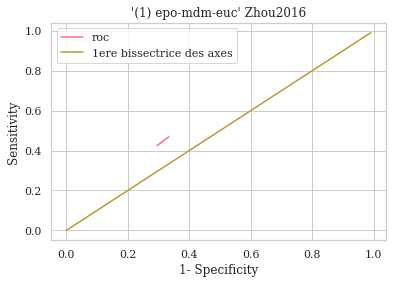

Computing rank from data with rank=None
    Using tolerance 24 (2.2e-16 eps * 14 dim * 7.8e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9 (2.2e-16 eps * 14 dim * 3.2e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated ran

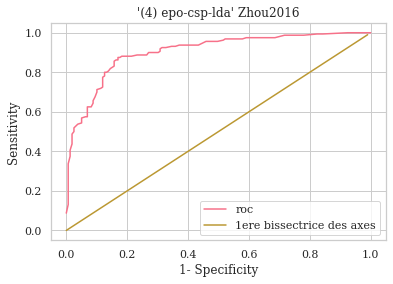

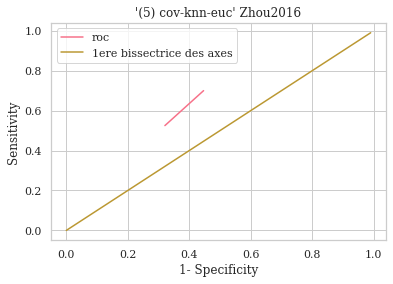

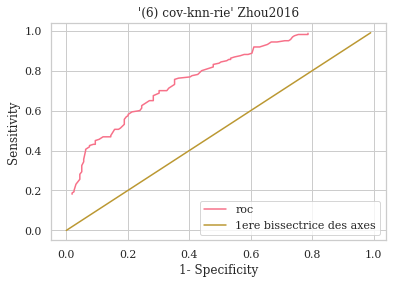

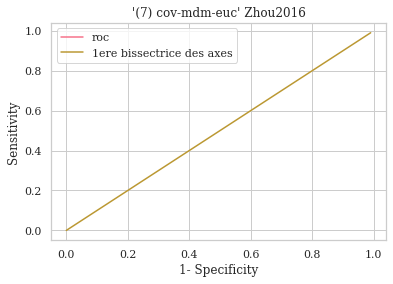

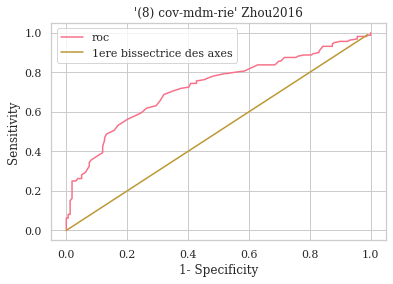

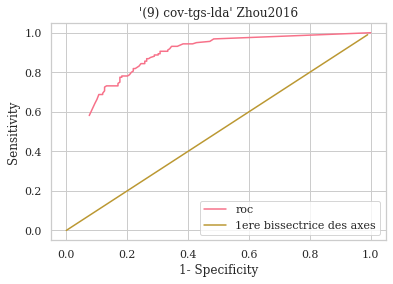

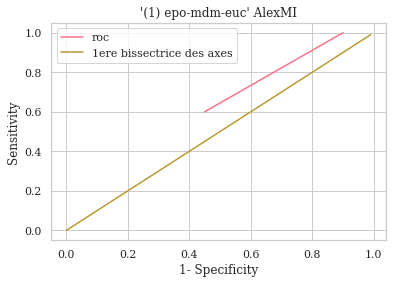

Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 16 dim * 4.3e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 16 dim * 4.3e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4 (2.2e-16 eps * 16 dim * 3.8e+14  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 16 dim * 4.3e+14  max singular value)
    Estimated ra

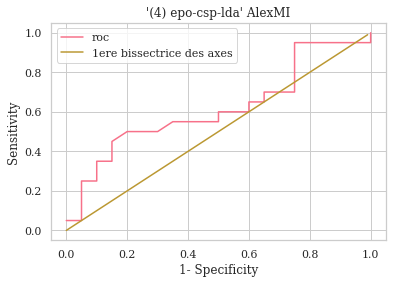

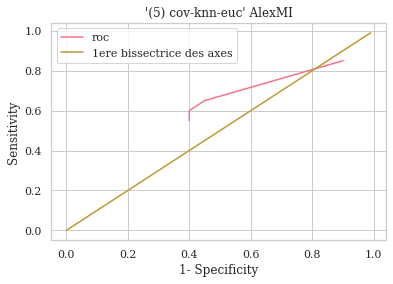

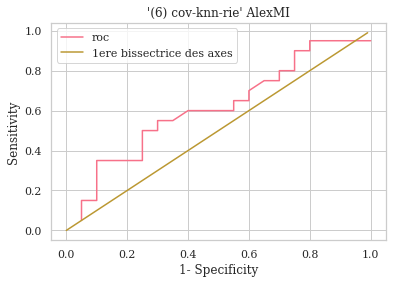

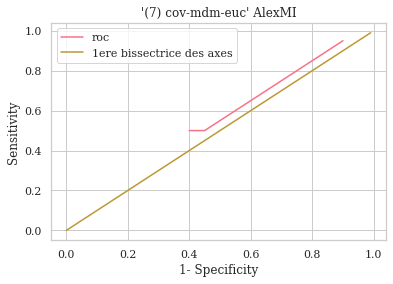

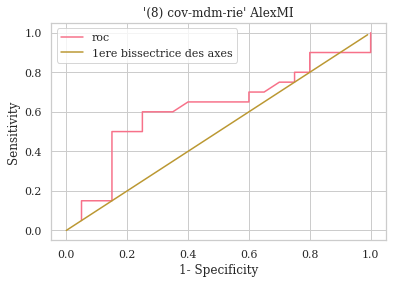

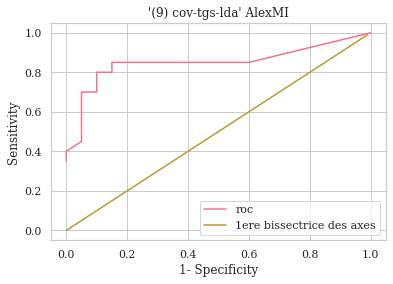

In [92]:

def print_fct_roc(k):
    n = 100
    THRESHOLD = [i/n for i in range(0,n)]
    p = pipe[k%len(pipe)]
    l_one_spec, l_senstivity = fct_roc(k, p)
    plt.plot(l_one_spec, l_senstivity, label="roc")
    plt.plot(THRESHOLD, THRESHOLD, label="1ere bissectrice des axes")
    plt.xlabel('1- Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f"'{pipe_names[k%len(pipe)]}' {datasets_names[k//len(pipe_names)]}")
    # plt.xlim(0, 1)
    # plt.ylim(0, 1)
    plt.legend()
    plt.show()
    
for k in range(len(DSM)):
    print_fct_roc(k)

In [93]:
def auc_roc(l_one_spec, l_senstivity):
    auc = 0
    for i in range(len(l_one_spec)-1):
        auc += (l_one_spec[i+1]-l_one_spec[i])*(l_senstivity[i+1]+l_senstivity[i])/2
    return abs(auc)
AUC = []
for i in range(len(DSM)):
    p = pipe[i%len(pipe)]
    AUC.append(auc_roc(fct_roc(i, p)[0], fct_roc(i, p)[1]))

Computing rank from data with rank=None
    Using tolerance 24 (2.2e-16 eps * 14 dim * 7.8e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9 (2.2e-16 eps * 14 dim * 3.2e+15  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6 (2.2e-16 eps * 14 dim * 3.1e+15  max singular value)
    Estimated ran

In [94]:
T_ACCURACY = []
for elt in ACCURACY:
    if elt < 0.5:
        T_ACCURACY.append(1-elt)
    else:
        T_ACCURACY.append(elt)
print(T_ACCURACY)
print(AUC)

[0.5642633228840125, 0.8369905956112853, 0.6018808777429467, 0.6896551724137931, 0.554858934169279, 0.670846394984326, 0.7962382445141066, 0.575, 0.55, 0.6, 0.6, 0.525, 0.65, 0.825]
[0.016863207547169808, 0.9038718553459119, 0.07704402515723269, 0.5567020440251573, 0.0, 0.7219929245283017, 0.8529481132075472, 0.3600000000000001, 0.615, 0.36874999999999997, 0.6124999999999999, 0.35125, 0.6149999999999999, 0.8487499999999999]


In [98]:
import csv

with open('results_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['count', 'auc_roc_score', 'accuracy', 'subject','dataset', 'pipeline']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(AUC)):
        writer.writerow({'count': i, 'auc_roc_score': AUC[i], 'accuracy': T_ACCURACY[i], 'subject': 1, 'dataset': f'{datasets_names[i//len(pipe)]}', 'pipeline': pipe_names[i%len(pipe)]})


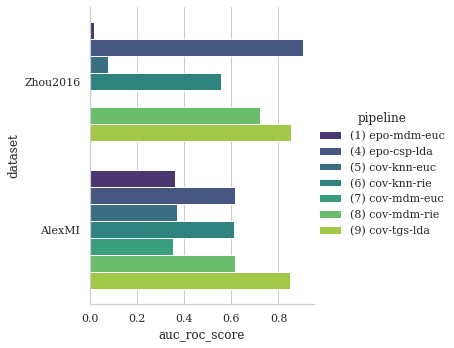

In [102]:
data = pd.read_csv('results_data.csv')

sns.catplot(
    y="dataset", x="auc_roc_score", hue="pipeline", data=data, orient="h", palette="viridis", kind="bar"
)